In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# **1)**

In [2]:
# Define the column names
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

# Load the dataset into a pandas DataFrame with column names
df = pd.read_csv('/content/data_banknote_authentication.csv', names=columns)

# Output the DataFrame
print(df.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [5]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [6]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [7]:
df.duplicated().sum()

24

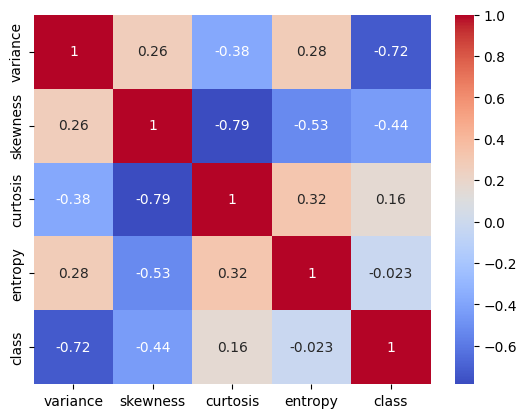

In [8]:
sns.heatmap(df.corr(), cmap="coolwarm", annot = True)
plt.show()

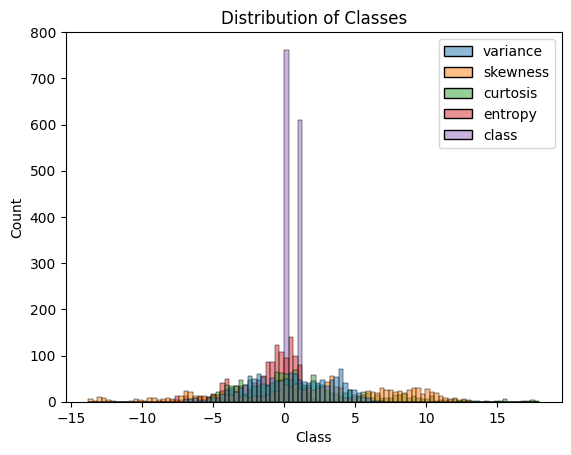

In [9]:
sns.histplot(data=df)
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.show()

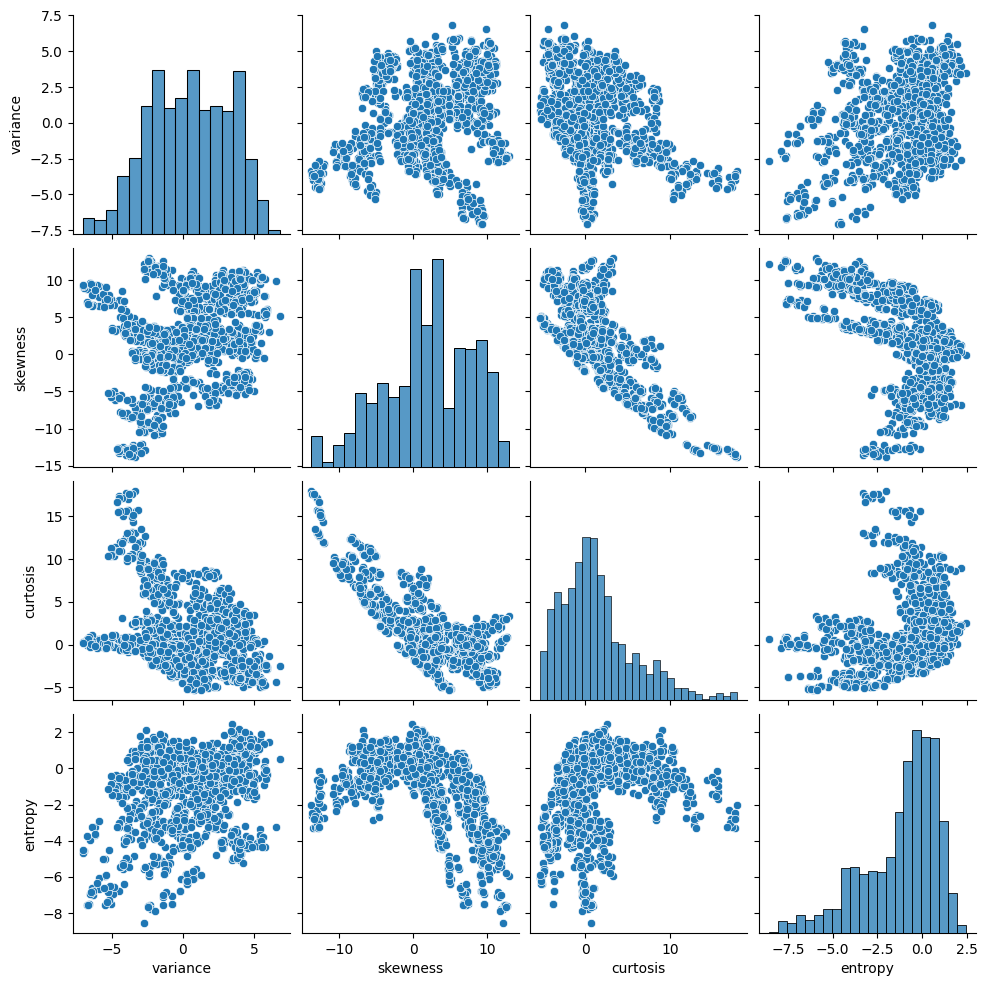

In [10]:
sns.pairplot(data=df.iloc[:, :-1])
plt.show()

In [11]:
print(df['variance'].value_counts(sort = True))

 0.5706    5
 0.5195    4
 0.3292    4
 0.3798    4
-2.6479    3
          ..
 0.1848    1
 4.5707    1
 2.9742    1
 1.1472    1
-2.5419    1
Name: variance, Length: 1338, dtype: int64


In [12]:
print(df['skewness'].value_counts(sort = True))

-4.45520    6
-3.26330    5
 0.70980    4
-3.79710    4
-0.02480    4
           ..
 8.81100    1
 6.40230    1
 7.27970    1
 2.10860    1
-0.65804    1
Name: skewness, Length: 1256, dtype: int64


In [13]:
print(df['curtosis'].value_counts(sort = True))

 1.2421    5
 4.5718    5
 3.0895    5
 0.7572    4
-3.7044    3
          ..
-2.0439    1
 1.0588    1
-0.7843    1
-2.9024    1
 2.6842    1
Name: curtosis, Length: 1270, dtype: int64


In [14]:
print(df['entropy'].value_counts(sort = True))

-0.29570    5
-0.98880    5
-0.44440    4
 0.36119    4
-0.23751    4
           ..
 0.75558    1
-0.44182    1
-0.24010    1
-1.30820    1
-2.77710    1
Name: entropy, Length: 1156, dtype: int64


In [15]:
print(df['class'].value_counts(sort = True))

0    762
1    610
Name: class, dtype: int64


In [16]:
# Split the dataset into features (X) and target (y)
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [17]:
# Replace missing values with the mean of the column
df = df.fillna(df.mean(axis=0))

In [18]:
# Normalize the features
x = (x - np.mean(x)) / np.std(x)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [19]:
# calculate correlation between each feature and target
corr = x.corrwith(y)

In [20]:
# select the 2 features with highest correlation
top_features = corr.abs().sort_values(ascending=False).index[:2]
x = x[top_features]

In [21]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# Split the dataset into training and validation sets
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)


In [23]:
from sklearn.preprocessing import StandardScaler
# Standardize the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(987, 2)
(275, 2)
(110, 2)


In [25]:
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(987,)
(275,)
(110,)


# **2)**

In [26]:
# Train an SVM classifier
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [27]:
# Predict the test set labels
y_pred = clf.predict(x_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8618181818181818


In [28]:
# Analyzing the performance for different values of C
for C in [0.01, 0.1, 1, 10, 100]:
    # Train an SVM classifier with the current value of C
    clf = SVC(kernel='linear', C=C)
    clf.fit(x_train, y_train)

    # Predict the test set labels
    y_pred = clf.predict(x_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print('C =', C, 'Accuracy:', accuracy)

C = 0.01 Accuracy: 0.850909090909091
C = 0.1 Accuracy: 0.8581818181818182
C = 1 Accuracy: 0.8618181818181818
C = 10 Accuracy: 0.8618181818181818
C = 100 Accuracy: 0.8618181818181818


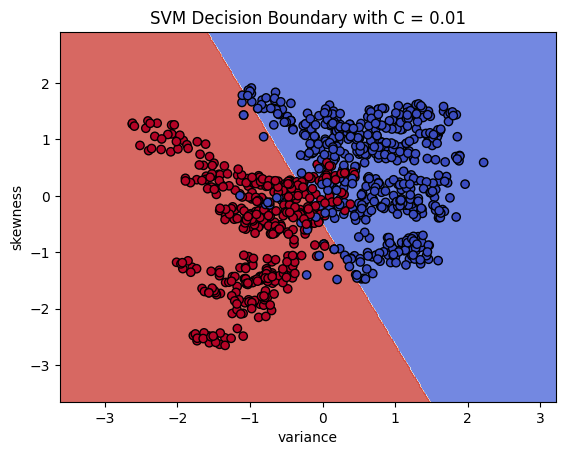

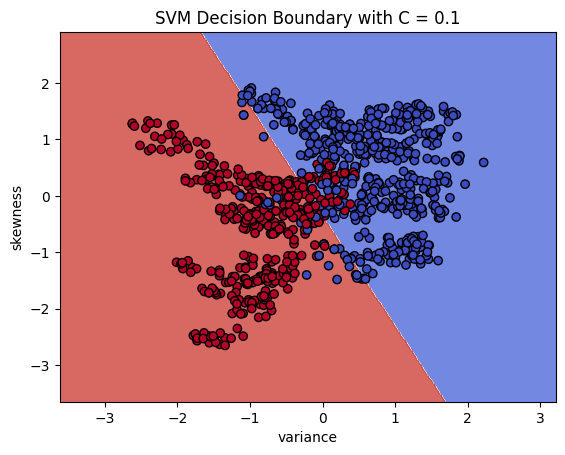

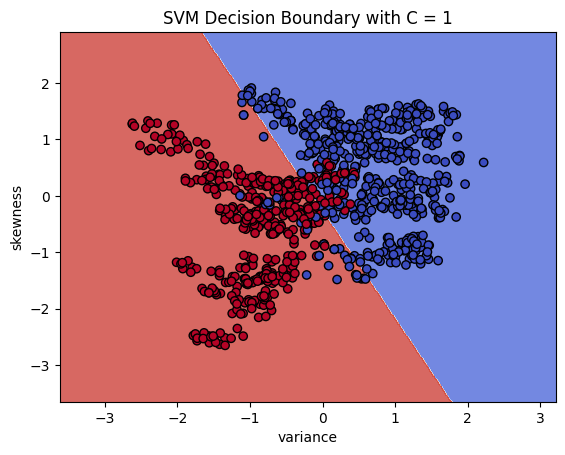

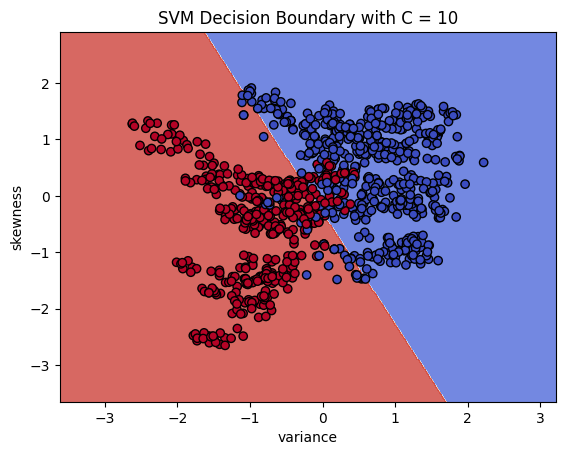

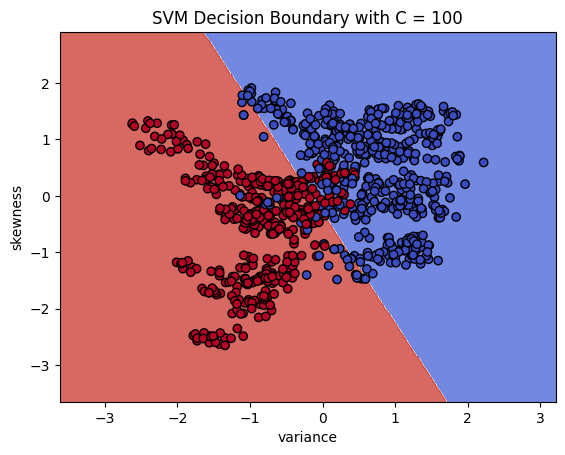

In [29]:
# define the SVM model with different kernels
C_values = [0.01, 0.1, 1, 10, 100]

for c in C_values:
    # train the SVM model
    svm = SVC(kernel='linear', C=c)
    svm.fit(x_train, y_train)

    # plot the decision boundary
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='black')
    plt.title('SVM Decision Boundary with C = {}'.format(c))
    plt.xlabel(top_features[0])
    plt.ylabel(top_features[1])
    plt.show()


# **3)**

In [30]:
# Train SVM models with different kernels
models = [
    ('Linear', SVC(kernel='linear')),
    ('RBF', SVC(kernel='rbf')),
    ('Quadratic', SVC(kernel='poly', degree=2))
]

for name, clf in models:
    # Train the SVM model
    clf.fit(x_train, y_train)

    # Predict the test set labels
    y_pred = clf.predict(x_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(name, 'Accuracy:', accuracy)

Linear Accuracy: 0.8618181818181818
RBF Accuracy: 0.9163636363636364
Quadratic Accuracy: 0.56


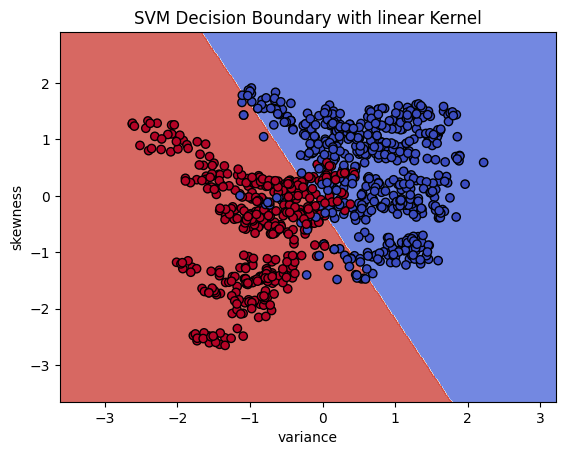

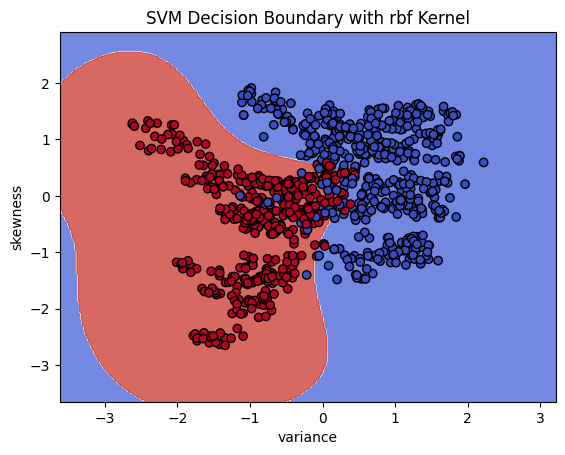

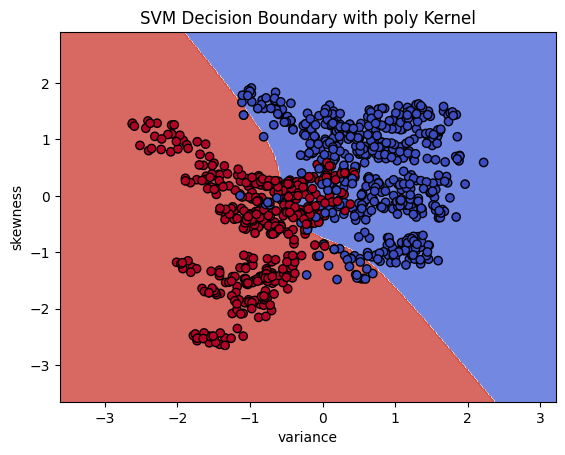

In [33]:
# define the SVM model with different kernels
kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    # train the SVM model
    svm = SVC(kernel=kernel)
    svm.fit(x_train, y_train)

    # plot the decision boundary
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='black')
    plt.title('SVM Decision Boundary with '+kernel+' Kernel')
    plt.xlabel(top_features[0])
    plt.ylabel(top_features[1])
    plt.show()
